<a href="https://colab.research.google.com/github/calldrj/Machine_Learning/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cov(W^) [Small Noise -> High Likelihood Curvature]:
[[ 0.00422354 -0.00627131]
 [-0.00627131  0.01254263]]

Cov(W^) [Large Noise -> Low Likelihood Curvature]:
[[ 0.11365888 -0.16876621]
 [-0.16876621  0.33753243]]



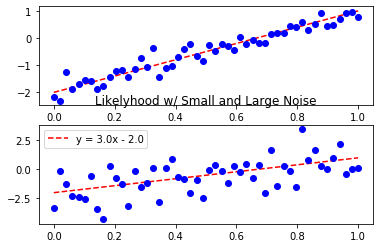

In [1]:
# Python code implementation for calculation the certainty there is in W^ estimation
# This can be done by determination of the covariance matrix of W^ 
# as discussed in Chapter 2 section 2.9.1 of A First Course of Machine Learning.
# Two synthetic dataset are generated using low and high levels of noise 
# formed around a true function.
# Each sampling point of two datasets is plotted using matplotlib for demonstration.
# The covariance matrix of W^ is calculated for each dataset using numpy
# The results show that the dataset with high noise level has significant high 
# values on the diagonal of the covariance matrix of W^ that those of low noise level

import matplotlib.pyplot as plt
import numpy as np

# Calculate then return the covariance matrix of W^
def cov_matrix(sample_size, x, y):
    XT = np.vstack([np.ones((1, n_samples)), x]) # Transpose matrix of X, XT
    XO = XT.transpose()                          # Original matrix of X, XO
    XD = np.dot(XT, XO)                          # Dot product of (XT, XO), XD
    XI = np.linalg.inv(XD)                       # Inverse matrix of XD, XI
    XP = np.dot(XI, XT)                          # Dot product of (XI, XT), XP
    TO = y.transpose()                           # Orignal matrix t, TO
    TT = TO.transpose()                          # Transpose matrix of t, TT
    TD = np.dot(TT, TO)                          # Dot product of (TT, TO), TD                          
    TX = np.dot(TT, XO)                          # Dot product of (TT, XO), TX 
    WH = np.dot(XP, TO)                          # Dot product of (XP, TO), WH
    TW = np.dot(TX, WH)                          # Dot product of (TX, WH), TX
    SI = (TD - TW)/n_samples                     # Squared standard deviation
    CW = SI * XI                                 # Covariance of W^
    return CW

n_samples = 50    # Sample size
w0 = -2.0         
w1 = 3.0
mu = 0            # Center of Gaussian distribution
start = 0         # Starting point of sample, x
stop  = 1         # Ending point of sample, x

# Legend for the plot
if w0 >= 0:
    l = 'y = ' + str(w1) + 'x + ' + str(w0)
else:
    l = 'y = ' + str(w1) + 'x - '   + str(-w0)

# Draw scatter plot of sampled dataset and plot of its true function 
plt.figure()
for i in (1,2):
    sp = 210 + i
    plt.subplot(sp)
    if i == 1:
        mu, sigma = 0, 0.5
        legend = '[Low Noise -> High Likelihood Curvature]'
    else:
        mu, sigma = 0, 1
        legend = '[High Noise -> Low Likelihood Curvature]'

    x = np.linspace(start, stop, n_samples)
    y = w0 + w1 * x
    noise = np.random.normal(mu, sigma * sigma, n_samples)
    # Print out the covariance matrix of W^
    print('Cov(W^) ' + legend + f':\n{cov_matrix(n_samples, x, y + noise)}\n')
    plt.plot(x, y, 'r--', label = l)
    plt.plot( x, y + noise, 'bo')

plt.title('Likelyhood w/ Small and Large Noise\n')
plt.legend()
plt.show()